In [1]:
import numpy as np
data = np.load('lab2_data.npz', allow_pickle=True)['data']

In [2]:
phoneHMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
#phoneHMMs = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()

In [3]:
phoneHMMs["f"]

{'name': 'f',
 'startprob': array([1., 0., 0., 0.]),
 'transmat': array([[0.8437548, 0.1562452, 0.       , 0.       ],
        [0.       , 0.7090222, 0.2909778, 0.       ],
        [0.       , 0.       , 0.3064214, 0.6935785],
        [0.       , 0.       , 0.       , 1.       ]]),
 'means': array([[ 3.223918e+02, -2.714506e+02, -1.279559e+02,  4.936052e+01,
         -1.980236e+00, -9.977302e+00, -2.686330e+01, -4.009798e+01,
          3.357593e-01, -7.339875e+01,  2.645822e+01, -6.140060e+01,
          3.153127e+01],
        [ 4.886330e+02, -2.018883e+02, -1.998543e+02, -3.249403e+00,
         -1.454704e+01, -1.020947e+01, -5.742544e+01, -1.035629e+02,
         -2.134682e+01, -9.308153e+01,  2.632338e+01, -8.978764e+01,
          2.653858e+01],
        [ 5.815154e+02,  2.457827e+02,  2.437778e+01, -5.956849e+01,
         -1.490782e+02,  6.251358e+01, -1.867431e+01, -4.977795e+01,
          7.758113e+00,  1.062016e+02,  1.829358e+01,  2.677407e+01,
          1.664870e+01]]),
 'covars':

In [4]:
list(sorted(phoneHMMs.keys()))

['ah',
 'ao',
 'ay',
 'eh',
 'ey',
 'f',
 'ih',
 'iy',
 'k',
 'n',
 'ow',
 'r',
 's',
 'sil',
 'sp',
 't',
 'th',
 'uw',
 'v',
 'w',
 'z']

In [5]:
import pandas as pd
# Convert to DataFrame
df = pd.DataFrame(phoneHMMs["f"]["covars"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14393.750,7297.190,6038.205,4883.020,5352.986,6555.408,8515.243,10671.100,10332.080,10120.830,8832.828,10312.580,8047.129
1,5798.724,8801.242,6390.720,4633.797,6440.550,9419.420,5861.454,7522.581,10917.650,7469.309,9418.893,6266.922,7712.290
2,13902.990,10563.130,4930.186,19097.510,14233.630,5392.508,4200.502,4250.925,8332.633,24471.450,4684.705,6569.889,4883.375


In [6]:
pd.DataFrame(phoneHMMs["f"]["means"])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,322.3918,-271.4506,-127.95590,49.360520,-1.980236,-9.977302,-26.86330,-40.09798,0.335759,-73.39875,26.45822,-61.40060,31.53127
1,488.6330,-201.8883,-199.85430,-3.249403,-14.547040,-10.209470,-57.42544,-103.56290,-21.346820,-93.08153,26.32338,-89.78764,26.53858
2,581.5154,245.7827,24.37778,-59.568490,-149.078200,62.513580,-18.67431,-49.77795,7.758113,106.20160,18.29358,26.77407,16.64870


In [7]:
prondict = {} 
prondict['o'] = ['ow']
prondict['z'] = ['z', 'iy', 'r', 'ow']
prondict['1'] = ['w', 'ah', 'n']
prondict['2'] = ['t', 'uw']
prondict['3'] = ['th', 'r', 'iy']
prondict['4'] = ['f', 'ao', 'r']
prondict['5'] = ['f', 'ay', 'v']
prondict['6'] = ['s', 'ih', 'k', 's']
prondict['7'] = ['s', 'eh', 'v', 'ah', 'n']
prondict['8'] = ['ey', 't']
prondict['9'] = ['n', 'ay', 'n']
isolated = {}
for digit in prondict.keys():
    isolated[digit] = ['sil'] + prondict[digit] + ['sil']

In [8]:
def concatTwoHMMs1(hmm1, hmm2):
   #startprob
   M1 = len(hmm1["startprob"])
   M2 = len(hmm2["startprob"])
   startprob_conc = np.zeros((M1+M2-1))
   for i in range(M1+M2-1):
      if i<M1-1:
         startprob_conc[i]=hmm1["startprob"][i]
      else:
         startprob_conc[i]=hmm1["startprob"][-1]*hmm2["startprob"][i-M2]
concatTwoHMMs1(phoneHMMs["sil"],phoneHMMs["sil"])


# 4

In [9]:
from lab2_proto import concatHMMs
wordHMMs = {}
wordHMMs['o'] = concatHMMs(phoneHMMs, isolated['o'])

# 5

### 5.1

In [10]:
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()

In [11]:
list(example.keys())

['filename',
 'samplingrate',
 'gender',
 'speaker',
 'digit',
 'repetition',
 'samples',
 'lmfcc',
 'obsloglik',
 'logalpha',
 'loglik',
 'vloglik',
 'vpath',
 'logbeta',
 'loggamma']

In [12]:
from lab2_tools import log_multivariate_normal_density_diag

In [13]:
X0 = example['lmfcc'] #71 "frames" of size 13, one datapoint
obsloglik=log_multivariate_normal_density_diag(X0,wordHMMs['o']["means"],wordHMMs['o']["covars"])
np.allclose(obsloglik,example['obsloglik'])

True

In [14]:
import matplotlib.pyplot as plt

def plot(data,xlabel="",ylabel="",title="Overlapping Windows Visualization"):
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(data, cmap='viridis')
    plt.colorbar(label='Value')
    #plt.xlim(0,400)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [22]:
data[10]

{'filename': '/home/giampi/corpora/tidigits/disc_4.2.1/tidigits/test/man/bm/4a.wav',
 'samplingrate': 20000,
 'gender': 'man',
 'speaker': 'bm',
 'digit': '4',
 'repetition': 'a',
 'samples': array([ 6,  6,  5, ..., -2, -2, -1], dtype=int16),
 'lmfcc': array([[ 1.01318727e+02, -7.14466163e+01,  3.09994165e+01, ...,
         -3.45512450e+01, -4.55661048e+01, -1.91574592e+00],
        [ 7.87194300e+01, -4.72433682e+01,  3.71363380e+01, ...,
         -1.11627272e+02,  8.52729431e+01, -8.87404878e+01],
        [ 8.44890401e+01, -4.65104968e+01,  4.33241770e+01, ...,
         -7.01323819e+01,  1.74398854e+02,  2.36177739e+02],
        ...,
        [ 1.08892440e+02, -4.61340099e+01,  9.49784587e+01, ...,
         -3.69189720e+01, -6.29931692e+01,  4.61959055e-02],
        [ 1.02464943e+02, -4.12118207e+01,  1.24534572e+02, ...,
         -4.78639955e+01,  3.59484658e+00, -1.44153421e+02],
        [ 9.24232655e+01, -5.49259083e+01,  1.49216576e+02, ...,
          1.48486385e+02,  1.45836343e+0

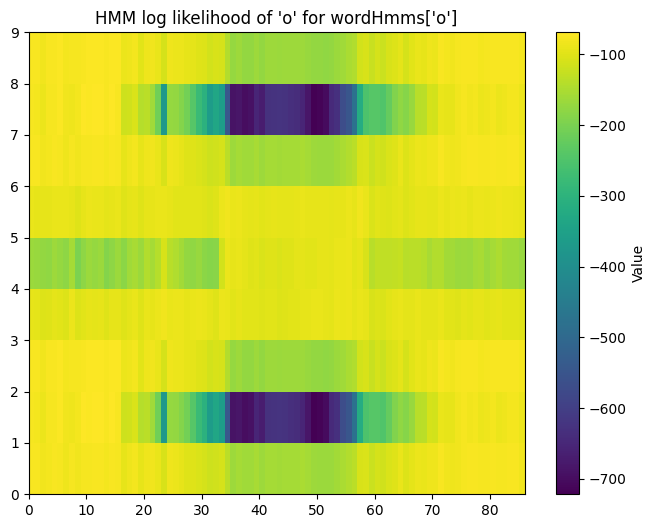

In [23]:
X1 = data[10]["lmfcc"]
log_likelihoods=log_multivariate_normal_density_diag(X1,wordHMMs['o']["means"],wordHMMs['o']["covars"])
plot(log_likelihoods.T,title="HMM log likelihood of 'o' for wordHmms['o']")

### 5.2

In [ ]:
from lab2_tools import logsumexp
def forward(log_emlik, log_startprob, log_transmat):
    """Forward (alpha) probabilities in log domain.

    Args:
        log_emlik: NxM array of emission log likelihoods, N frames, M states
        log_startprob: log probability to start in state i
        log_transmat: log transition probability from state i to j

    Output:
        forward_prob: NxM array of forward log probabilities for each of the M states in the model
    """
    #j enumerates states
    N,M = log_emlik.shape()

    alpha = np.zeros(N,M)

    #first row of alpha
    for j in range(M):
        alpha[0,j] = log_startprob[j]+log_emlik[0,j]
        #log_emlik[i,j]=log phi_j(x_i)
        #we want log phi_j(x_o) => log_emlik[0,j]
    #all other rows
    for n in range(1,N):
        for j in range(1,M):
            alpha[n,j]=logsumexp(alpha[n-1,:]+log_transmat[i,j])+log_emlik[n,j]
    return alpha

In [1]:
x = [1,2,3,4]
x[:-1]

[1, 2, 3]